# A GAN demo implemented with Tensorflow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
batch_size = 5000
x_dim = 2
z_dim = 2
U = 1
T = 5

In [3]:
# A function to generate a batch of samples from p(x)
def data_generator():
    theta = np.random.randint(10, size=batch_size)/10
    x = np.array([5*np.cos(2 * np.pi * theta), 5*np.sin(2 * np.pi * theta)]).T + np.random.randn(batch_size, 2)*0.5
    return x

In this demo, we use VGrow to learn a 2-dimensional mixture of Gaussian distributions $p(\mathbf{x})$ as shown below, with a simple 2-dimensional distribution $\mathbf{z} \sim \mathrm{uniform}([-1, 1]^2)$.

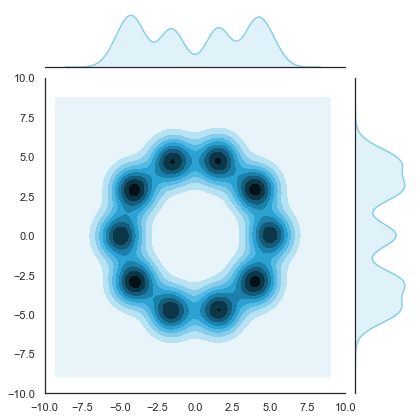

In [4]:
s = data_generator()
x = s[:, 0]
y = s[:, 1]
sns.set(style="white", color_codes=True)
sns.jointplot(x, y, kind='kde', color="skyblue", xlim=(-10, 10), ylim=(-10, 10))
plt.show()

In [5]:
Xplaceholder = tf.placeholder(dtype=tf.float32, shape=[None, x_dim], name='X')
Zplaceholder = tf.placeholder(dtype=tf.float32, shape=[None, z_dim], name='Z')
GZplaceholder = tf.placeholder(dtype=tf.float32, shape=[None, x_dim], name='GZ')

In [6]:
def generator(latent, reuse=False):
    with tf.variable_scope("generator", reuse=reuse):
        h = tf.layers.dense(latent, units=256, activation=tf.nn.relu)
        g = tf.layers.dense(h, units=x_dim)
        return g

In [7]:
def discriminator(data, reuse=False):
    with tf.variable_scope("discriminator", reuse=reuse):
        h = tf.layers.dense(data, units=256, activation=tf.nn.relu)
        d = tf.layers.dense(h, units=1)
        return d

In [8]:
GZ = generator(Zplaceholder)
d_real_logits = discriminator(Xplaceholder)
d_fake_logits = discriminator(GZplaceholder, reuse=True)

tf.nn.sigmoid_cross_entropy_with_logits(
    _sentinel=None,
    labels=None,
    logits=None,
    name=None
)

For brevity, let $x$ = logits, $z$ = labels. The logistic loss is:

\begin{align*}
& z * -\log(sigmoid(x)) + (1 - z) * -\log(1 - sigmoid(x))\\
= & z * -\log(1 / (1 + \exp(-x))) + (1 - z) * -\log(\exp(-x) / (1 + \exp(-x)))\\
= & z * \log(1 + \exp(-x)) + (1 - z) * (-\log(\exp(-x)) + \log(1 + \exp(-x)))\\
= & z * \log(1 + \exp(-x)) + (1 - z) * (x + \log(1 + \exp(-x))\\
= & (1 - z) * x + \log(1 + \exp(-x))\\
= & x - x * z + \log(1 + \exp(-x))
\end{align*}

In [9]:
loss_d_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits, labels=tf.ones_like(d_real_logits)))
loss_d_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, labels=tf.zeros_like(d_fake_logits)))
loss_d = loss_d_real + loss_d_fake

In [10]:
d_grad = tf.gradients(d_fake_logits, GZplaceholder)[0]

In [11]:
vars_g = [var for var in tf.trainable_variables() if var.name.startswith('generator')]
vars_d = [var for var in tf.trainable_variables() if var.name.startswith('discriminator')]

In [12]:
loss_g = 0.5 * tf.reduce_mean(tf.reduce_sum((GZ - GZplaceholder)**2, axis=1))

In [13]:
optimizer_d = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.5).minimize(loss_d, var_list=vars_d)
optimizer_g = tf.train.AdamOptimizer(learning_rate=0.001, beta1=0.5).minimize(loss_g, var_list=vars_g)

Step:  0   |  D real loss:  0.572633   |  D fake loss:  0.69477683   |  G loss:  0.0026732592


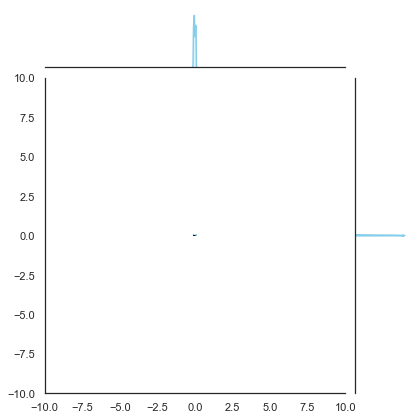

Step:  200   |  D real loss:  0.6378654   |  D fake loss:  0.7074593   |  G loss:  0.010151925


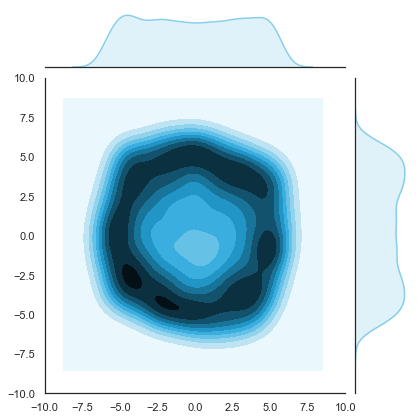

Step:  400   |  D real loss:  0.6391218   |  D fake loss:  0.63862324   |  G loss:  0.06704788


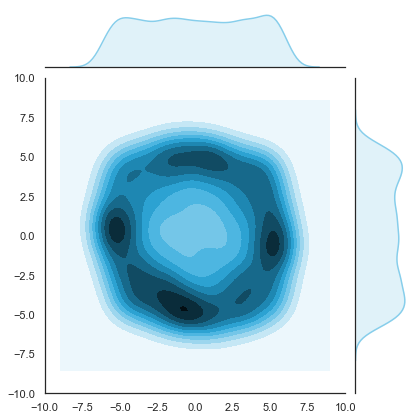

Step:  600   |  D real loss:  0.6381054   |  D fake loss:  0.66948664   |  G loss:  0.12839727


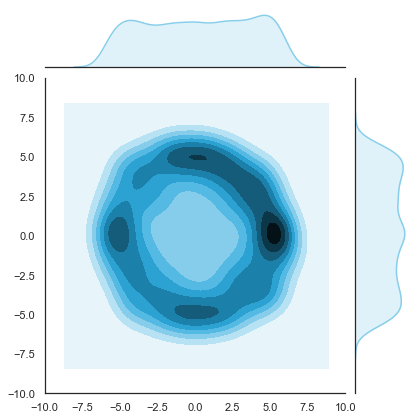

Step:  800   |  D real loss:  0.6731731   |  D fake loss:  0.6764064   |  G loss:  0.13471393


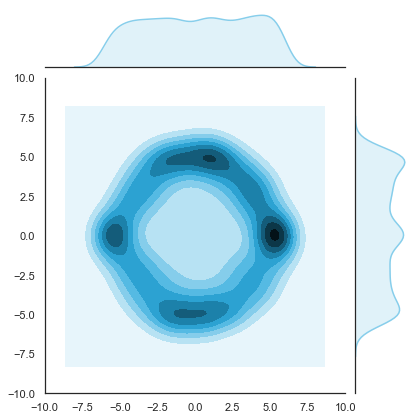

Step:  1000   |  D real loss:  0.7026286   |  D fake loss:  0.66943437   |  G loss:  0.12743731


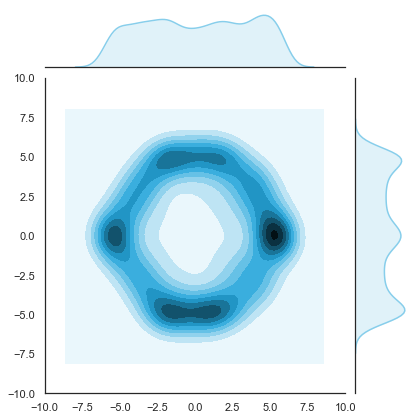

Step:  1200   |  D real loss:  0.7188247   |  D fake loss:  0.6757326   |  G loss:  0.1157487


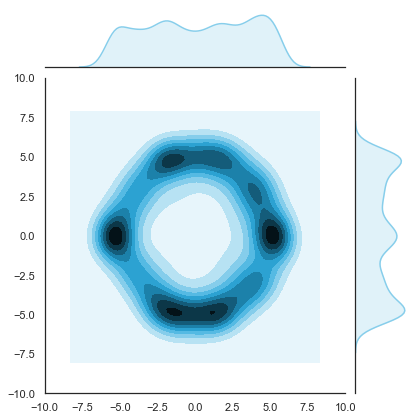

Step:  1400   |  D real loss:  0.7200086   |  D fake loss:  0.68500644   |  G loss:  0.10591566


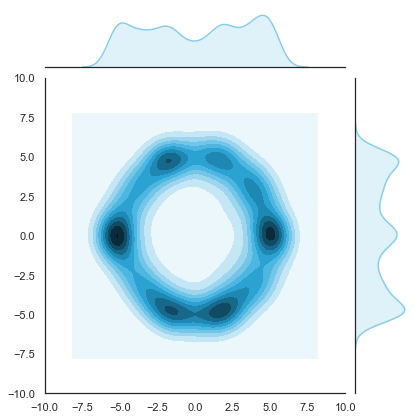

Step:  1600   |  D real loss:  0.6961251   |  D fake loss:  0.70184666   |  G loss:  0.08813428


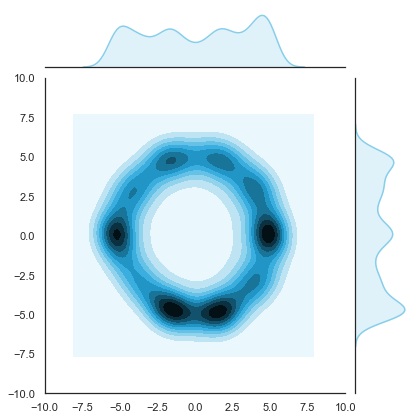

Step:  1800   |  D real loss:  0.69798845   |  D fake loss:  0.6994185   |  G loss:  0.081806935


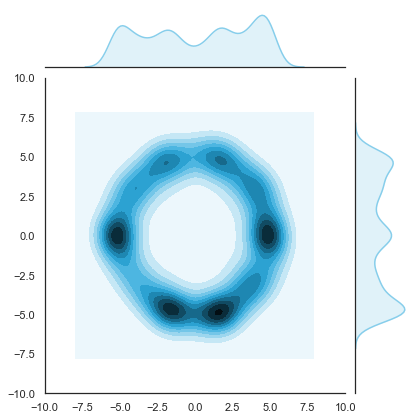

Step:  2000   |  D real loss:  0.69684386   |  D fake loss:  0.699808   |  G loss:  0.07581198


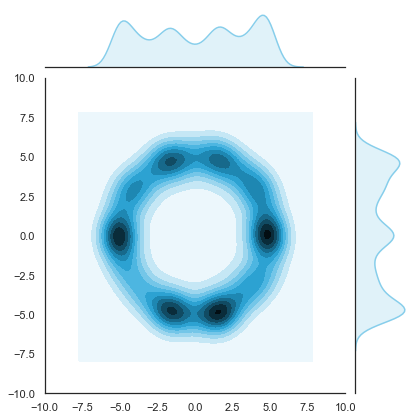

Step:  2200   |  D real loss:  0.70915556   |  D fake loss:  0.6940233   |  G loss:  0.07599276


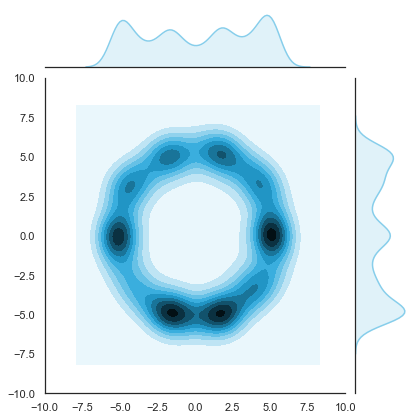

Step:  2400   |  D real loss:  0.6915444   |  D fake loss:  0.70278764   |  G loss:  0.068534985


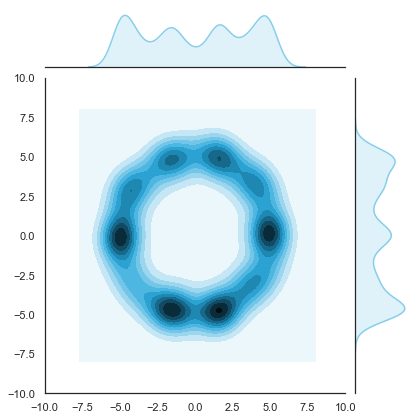

Step:  2600   |  D real loss:  0.72883236   |  D fake loss:  0.66966474   |  G loss:  0.06041001


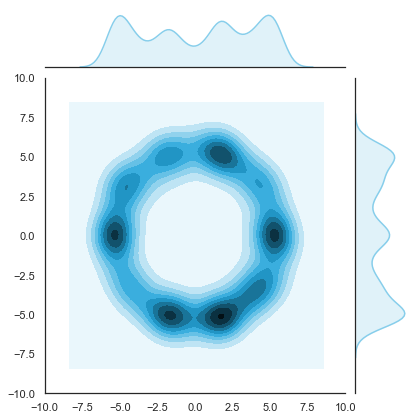

Step:  2800   |  D real loss:  0.7175608   |  D fake loss:  0.6803388   |  G loss:  0.06421847


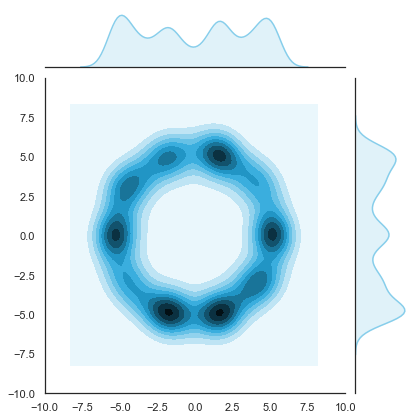

Step:  3000   |  D real loss:  0.6687083   |  D fake loss:  0.720528   |  G loss:  0.061642468


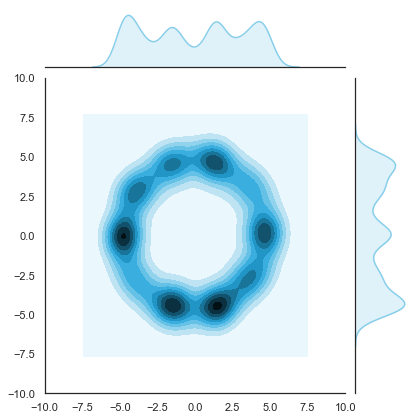

Step:  3200   |  D real loss:  0.71074814   |  D fake loss:  0.6738047   |  G loss:  0.05857567


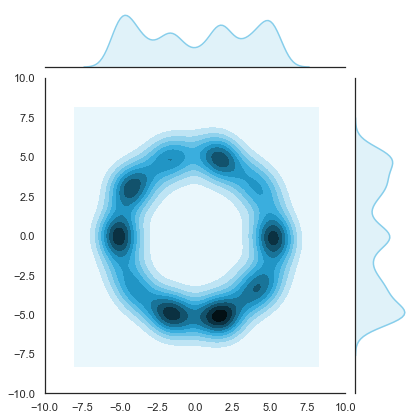

Step:  3400   |  D real loss:  0.72061116   |  D fake loss:  0.6818585   |  G loss:  0.06265903


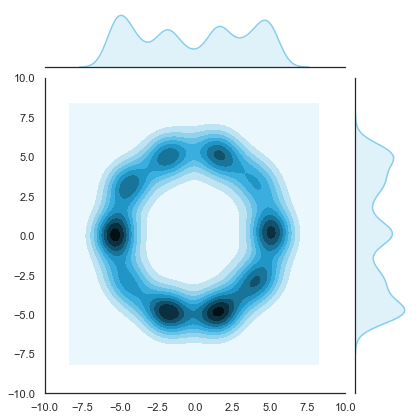

Step:  3600   |  D real loss:  0.7192045   |  D fake loss:  0.6628078   |  G loss:  0.05658176


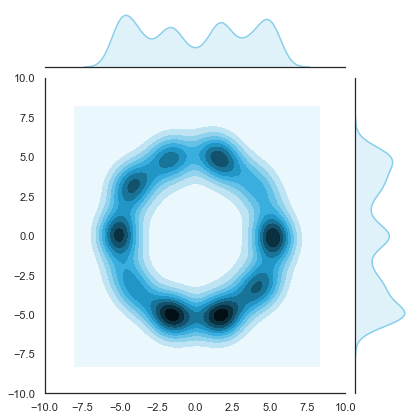

Step:  3800   |  D real loss:  0.7329141   |  D fake loss:  0.6495068   |  G loss:  0.05870187


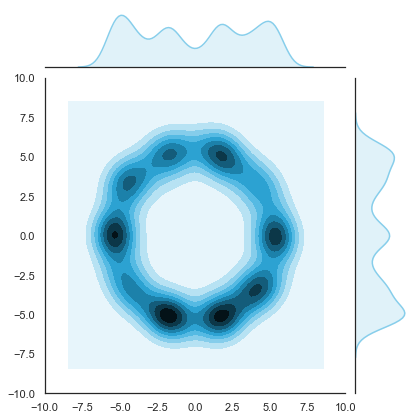

Step:  4000   |  D real loss:  0.6803222   |  D fake loss:  0.70740837   |  G loss:  0.06419614


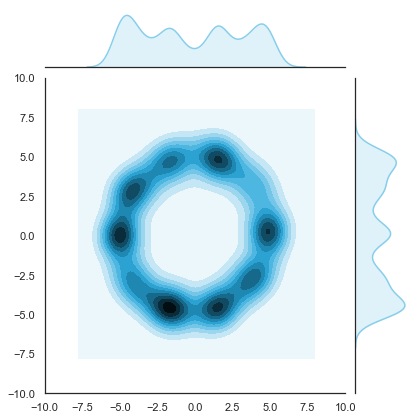

Step:  4200   |  D real loss:  0.70959914   |  D fake loss:  0.6815902   |  G loss:  0.053241186


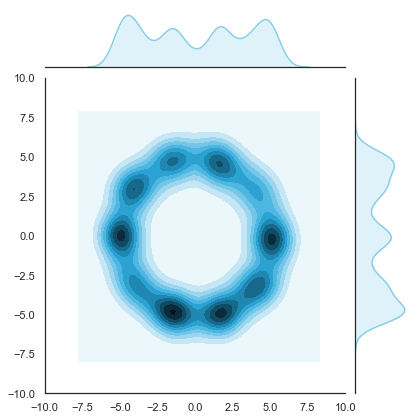

Step:  4400   |  D real loss:  0.6687842   |  D fake loss:  0.71275556   |  G loss:  0.058367863


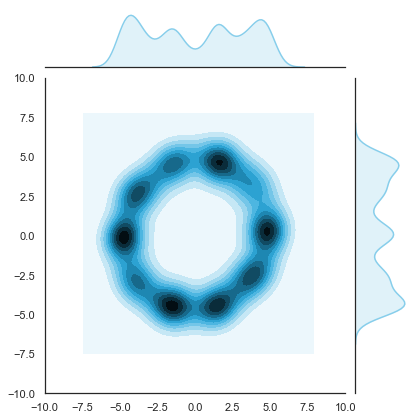

Step:  4600   |  D real loss:  0.70431757   |  D fake loss:  0.69131786   |  G loss:  0.05747176


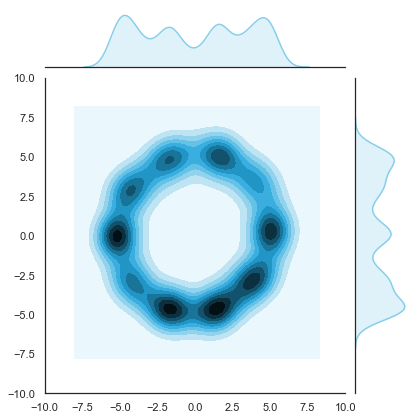

Step:  4800   |  D real loss:  0.71542937   |  D fake loss:  0.68932176   |  G loss:  0.05742278


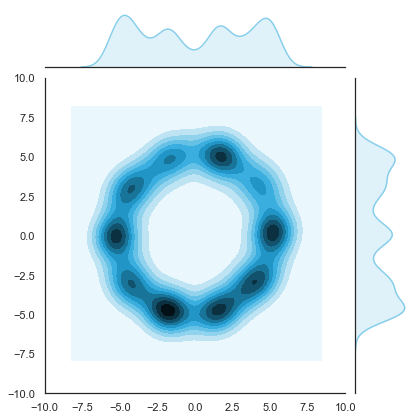

Step:  5000   |  D real loss:  0.68575937   |  D fake loss:  0.699906   |  G loss:  0.05705748


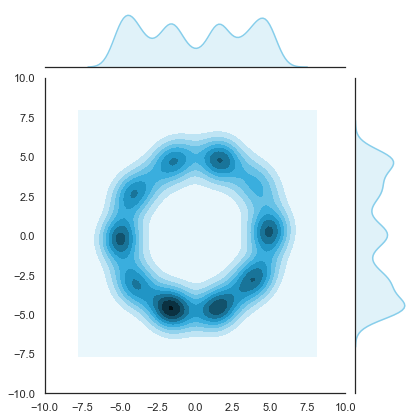

Step:  5200   |  D real loss:  0.6743621   |  D fake loss:  0.7359836   |  G loss:  0.052973237


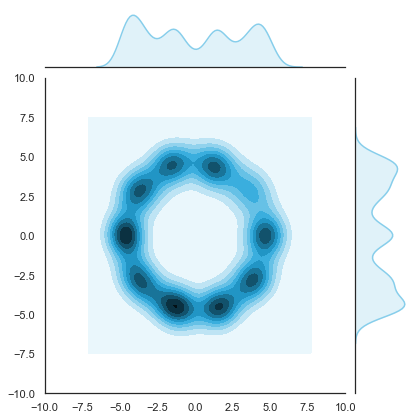

Step:  5400   |  D real loss:  0.75810456   |  D fake loss:  0.65071726   |  G loss:  0.05510419


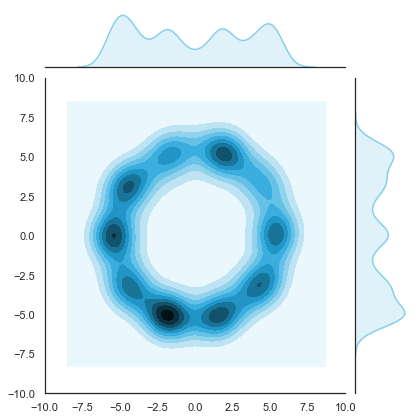

Step:  5600   |  D real loss:  0.68687177   |  D fake loss:  0.7193582   |  G loss:  0.048931822


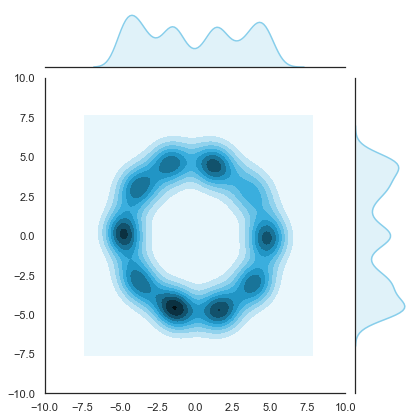

Step:  5800   |  D real loss:  0.67341125   |  D fake loss:  0.7129552   |  G loss:  0.05059304


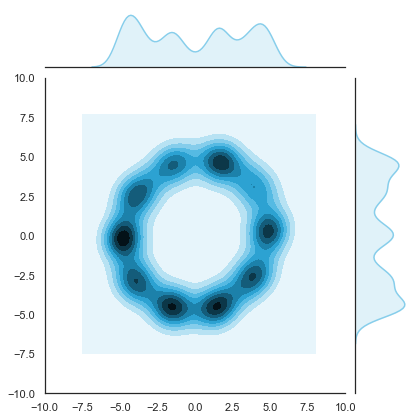

Step:  6000   |  D real loss:  0.74078196   |  D fake loss:  0.66853637   |  G loss:  0.05012022


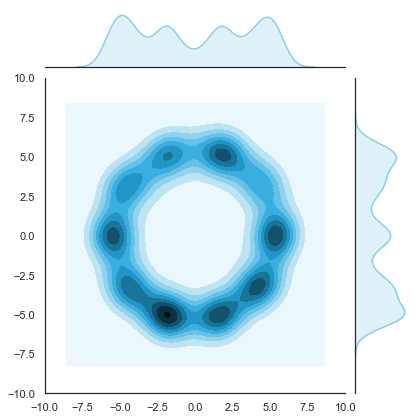

Step:  6200   |  D real loss:  0.7103478   |  D fake loss:  0.6747223   |  G loss:  0.045889758


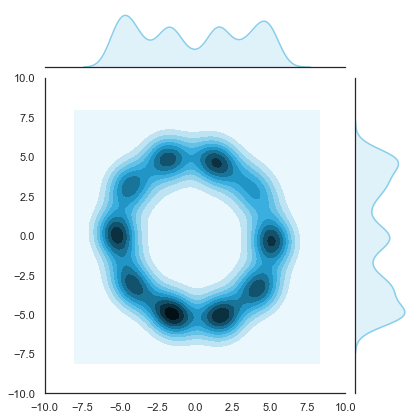

Step:  6400   |  D real loss:  0.6742874   |  D fake loss:  0.7282386   |  G loss:  0.04836505


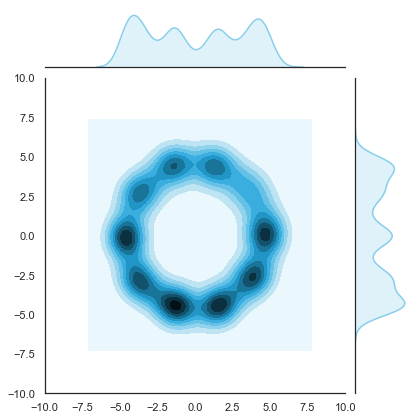

Step:  6600   |  D real loss:  0.6706923   |  D fake loss:  0.71369696   |  G loss:  0.050196394


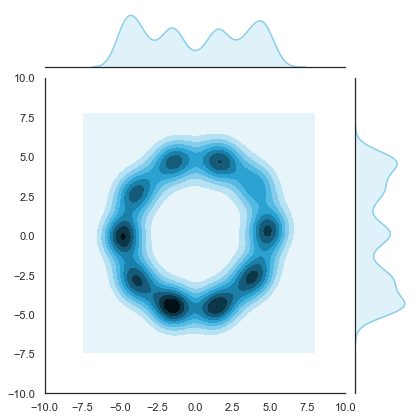

Step:  6800   |  D real loss:  0.7001952   |  D fake loss:  0.6921268   |  G loss:  0.04805895


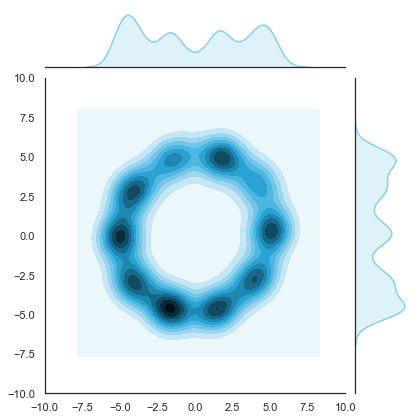

Step:  7000   |  D real loss:  0.70941025   |  D fake loss:  0.6835148   |  G loss:  0.048978742


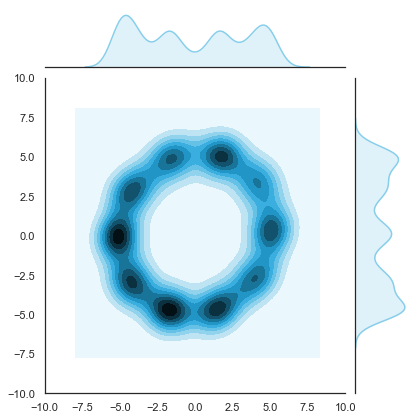

Step:  7200   |  D real loss:  0.69655764   |  D fake loss:  0.6946939   |  G loss:  0.048552494


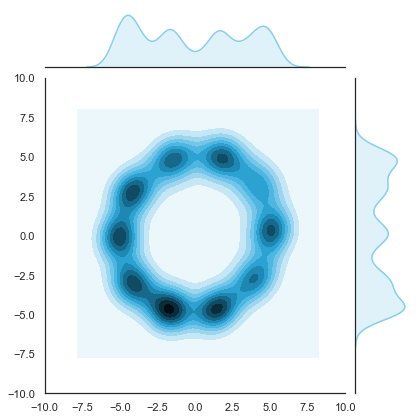

Step:  7400   |  D real loss:  0.6873199   |  D fake loss:  0.7045824   |  G loss:  0.045805257


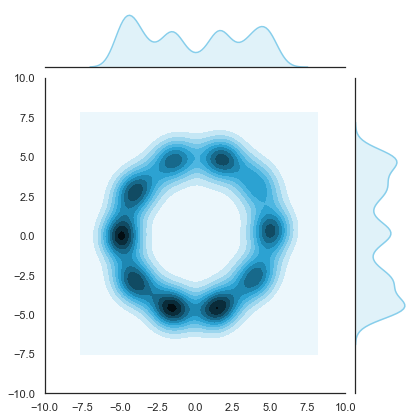

Step:  7600   |  D real loss:  0.7219874   |  D fake loss:  0.68455505   |  G loss:  0.046493407


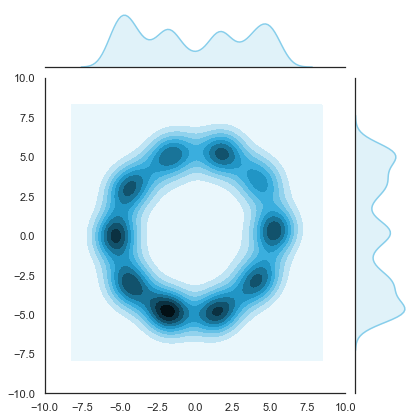

Step:  7800   |  D real loss:  0.7501956   |  D fake loss:  0.6543874   |  G loss:  0.043726414


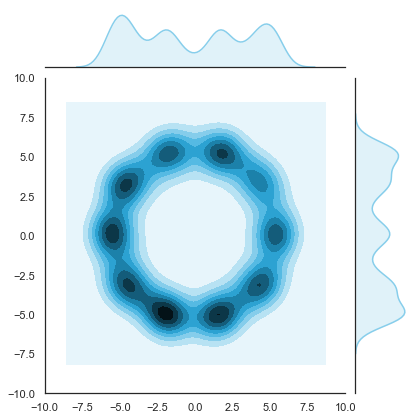

Step:  8000   |  D real loss:  0.72516054   |  D fake loss:  0.6627615   |  G loss:  0.042220734


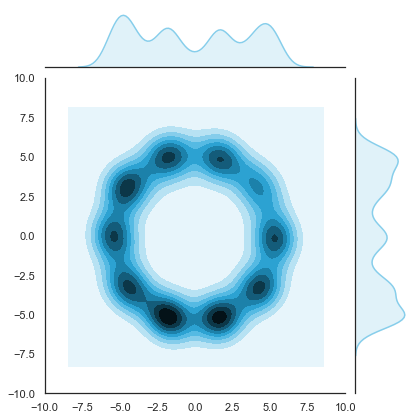

Step:  8200   |  D real loss:  0.69879454   |  D fake loss:  0.70473987   |  G loss:  0.040376164


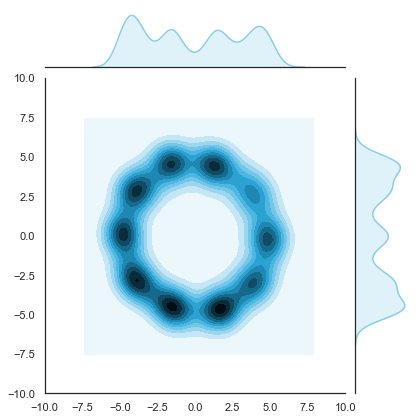

Step:  8400   |  D real loss:  0.7300915   |  D fake loss:  0.6785853   |  G loss:  0.04639895


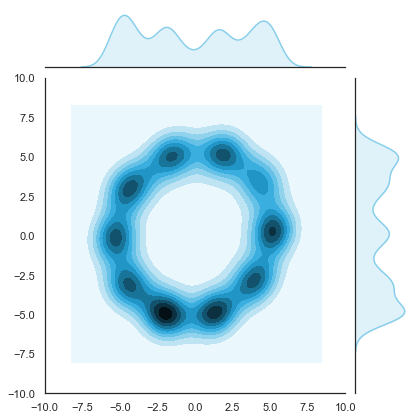

Step:  8600   |  D real loss:  0.7490757   |  D fake loss:  0.66767365   |  G loss:  0.04391295


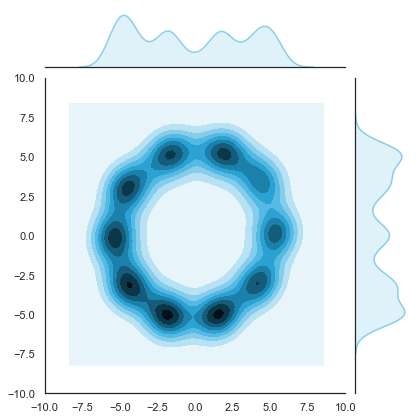

Step:  8800   |  D real loss:  0.65601337   |  D fake loss:  0.7428528   |  G loss:  0.041382454


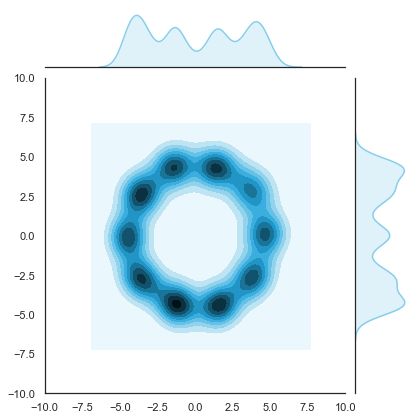

Step:  9000   |  D real loss:  0.73304355   |  D fake loss:  0.6542676   |  G loss:  0.04032757


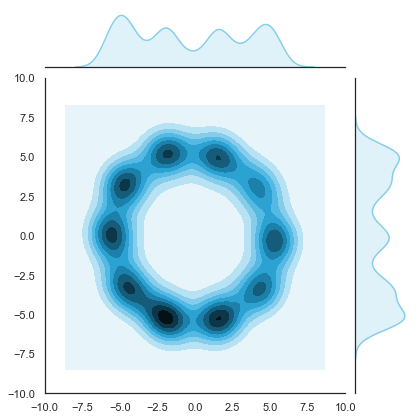

Step:  9200   |  D real loss:  0.69643235   |  D fake loss:  0.7102551   |  G loss:  0.040442407


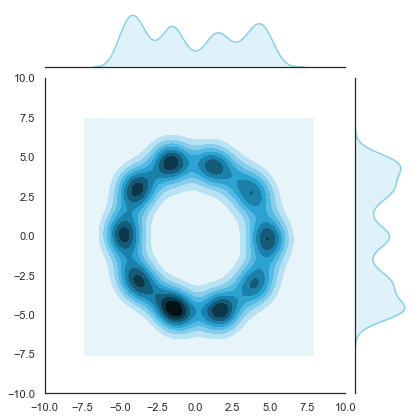

Step:  9400   |  D real loss:  0.6861301   |  D fake loss:  0.6995614   |  G loss:  0.0426204


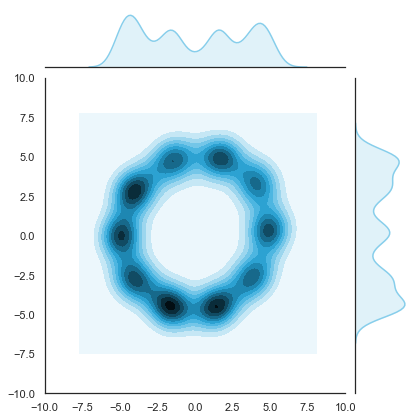

Step:  9600   |  D real loss:  0.748475   |  D fake loss:  0.64792466   |  G loss:  0.04056576


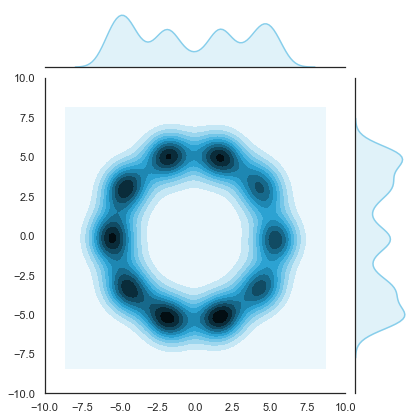

Step:  9800   |  D real loss:  0.6899507   |  D fake loss:  0.72097844   |  G loss:  0.03837554


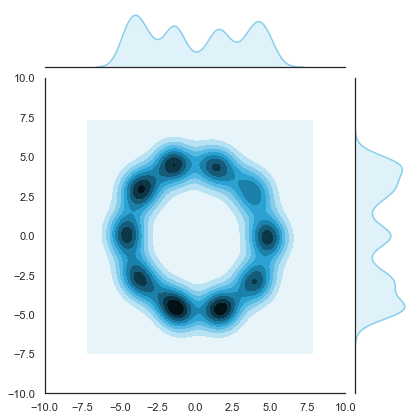

Step:  10000   |  D real loss:  0.66468954   |  D fake loss:  0.7145409   |  G loss:  0.040369604


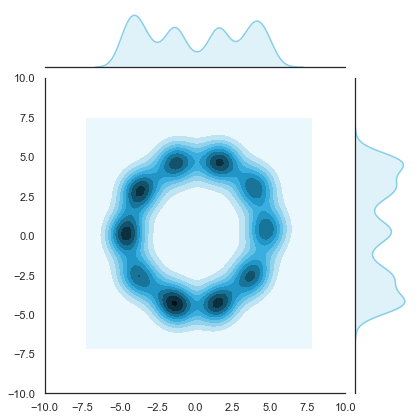

Step:  10200   |  D real loss:  0.72032356   |  D fake loss:  0.6784807   |  G loss:  0.0413611


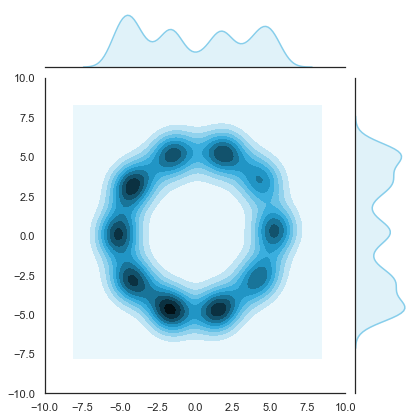

Step:  10400   |  D real loss:  0.73003125   |  D fake loss:  0.67413694   |  G loss:  0.03840556


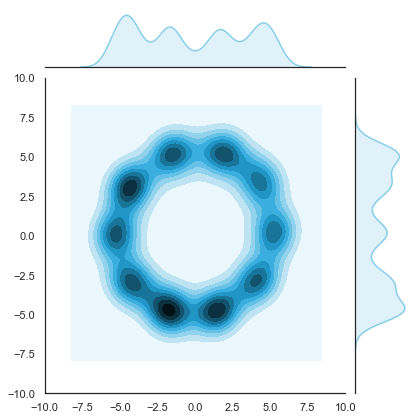

Step:  10600   |  D real loss:  0.7398991   |  D fake loss:  0.6720836   |  G loss:  0.038752235


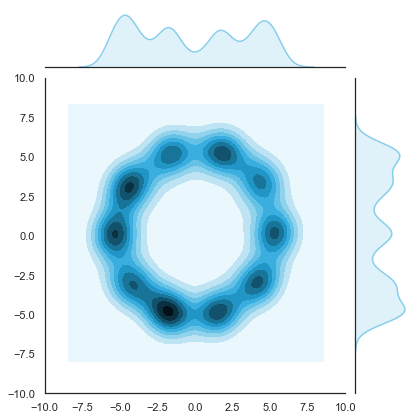

Step:  10800   |  D real loss:  0.7321661   |  D fake loss:  0.67269826   |  G loss:  0.037127513


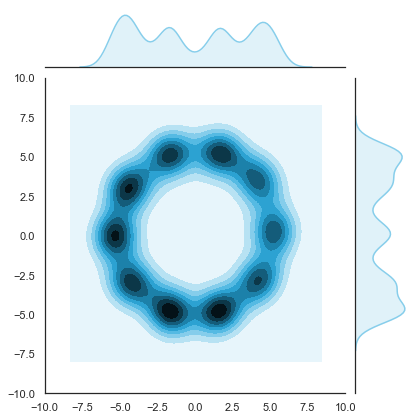

Step:  11000   |  D real loss:  0.7434449   |  D fake loss:  0.66521364   |  G loss:  0.03614935


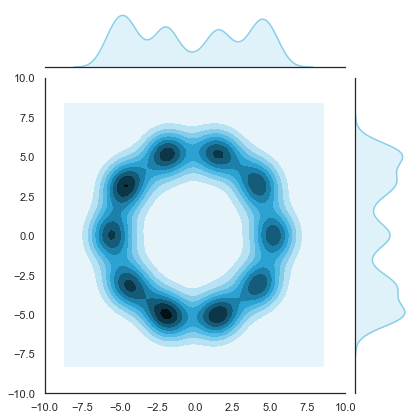

Step:  11200   |  D real loss:  0.6799961   |  D fake loss:  0.71888334   |  G loss:  0.03538902


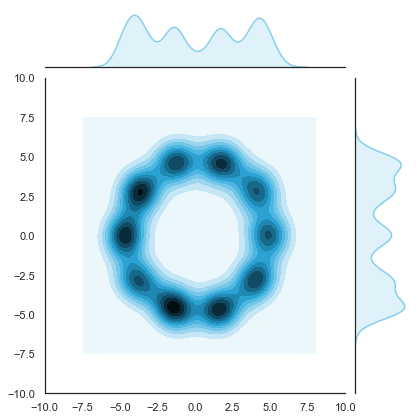

Step:  11400   |  D real loss:  0.7258086   |  D fake loss:  0.66914946   |  G loss:  0.044544935


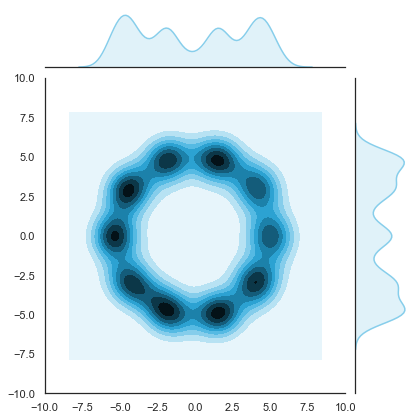

Step:  11600   |  D real loss:  0.7302749   |  D fake loss:  0.6650865   |  G loss:  0.03907513


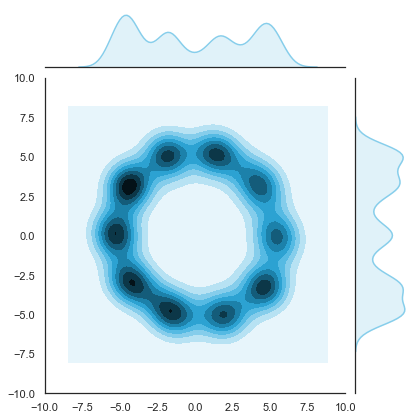

Step:  11800   |  D real loss:  0.74108833   |  D fake loss:  0.6097985   |  G loss:  0.037143078


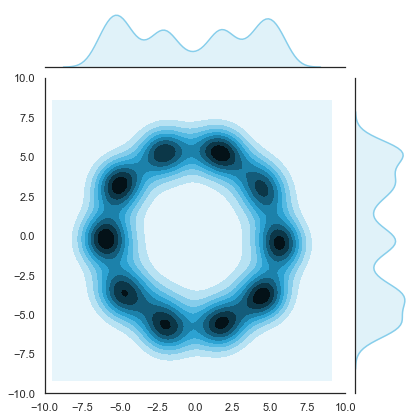

Step:  12000   |  D real loss:  0.7044571   |  D fake loss:  0.6864924   |  G loss:  0.035878625


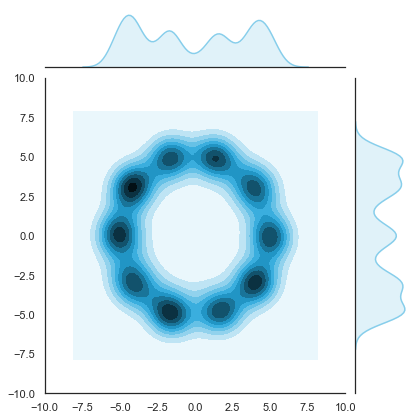

Step:  12200   |  D real loss:  0.7174074   |  D fake loss:  0.67670095   |  G loss:  0.03798989


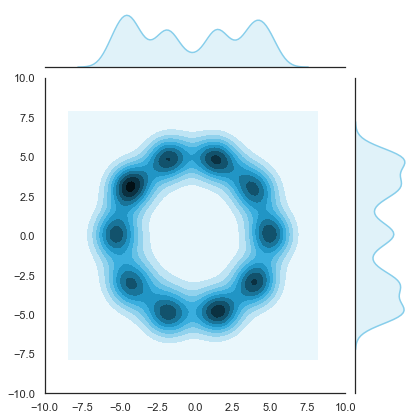

Step:  12400   |  D real loss:  0.7193744   |  D fake loss:  0.66782373   |  G loss:  0.038437244


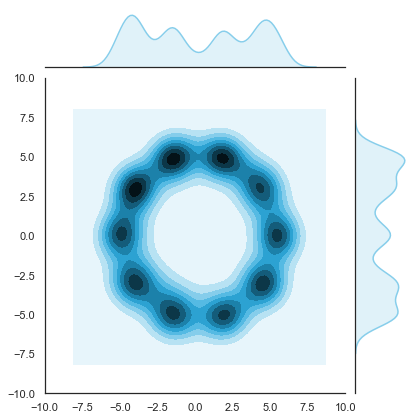

Step:  12600   |  D real loss:  0.7033284   |  D fake loss:  0.70354426   |  G loss:  0.048071664


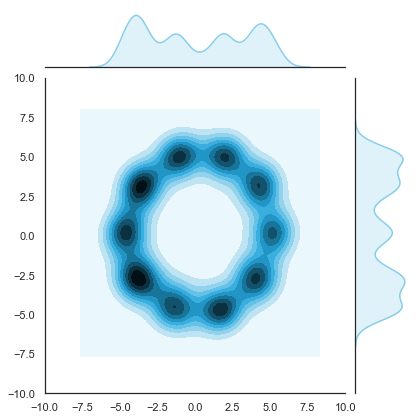

Step:  12800   |  D real loss:  0.68827605   |  D fake loss:  0.7157492   |  G loss:  0.03676701


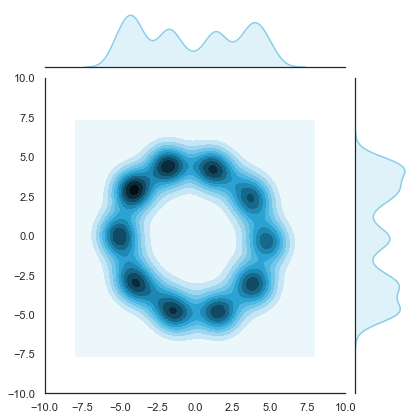

Step:  13000   |  D real loss:  0.6920932   |  D fake loss:  0.71418047   |  G loss:  0.03503996


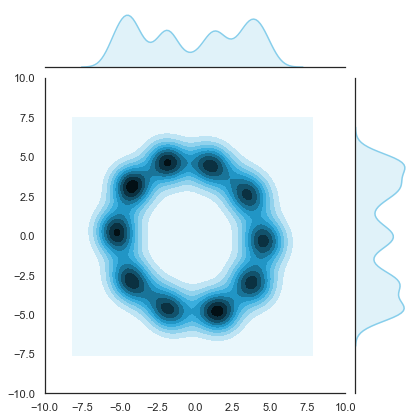

Step:  13200   |  D real loss:  0.70438147   |  D fake loss:  0.6937611   |  G loss:  0.0355406


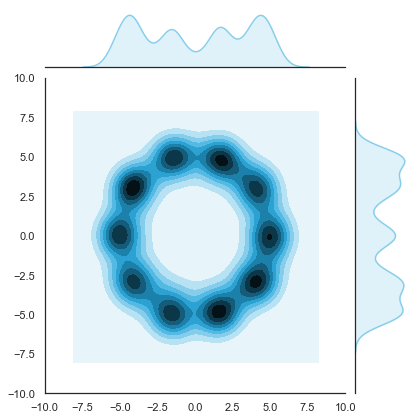

Step:  13400   |  D real loss:  0.7041087   |  D fake loss:  0.6856125   |  G loss:  0.036431354


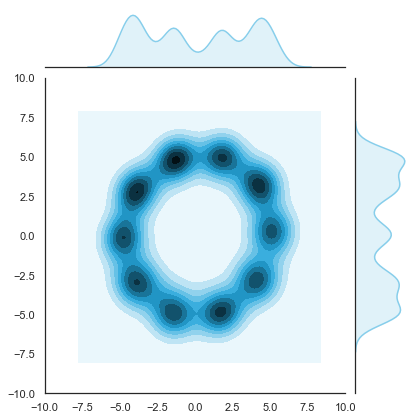

Step:  13600   |  D real loss:  0.7308133   |  D fake loss:  0.6817064   |  G loss:  0.042483684


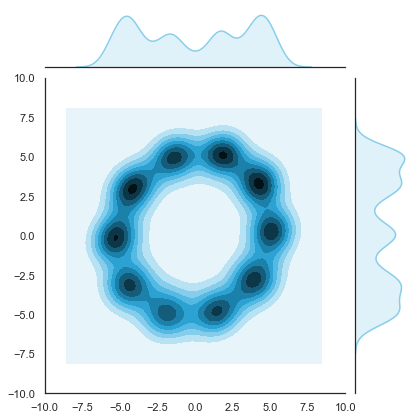

Step:  13800   |  D real loss:  0.7077162   |  D fake loss:  0.68345994   |  G loss:  0.03625335


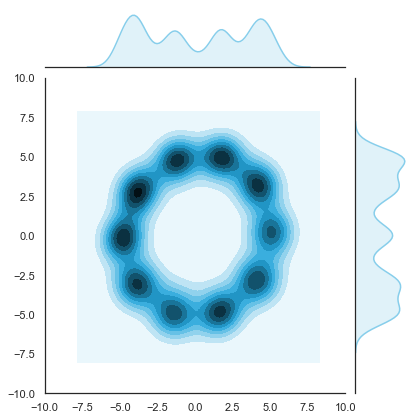

Step:  14000   |  D real loss:  0.713851   |  D fake loss:  0.68135035   |  G loss:  0.036064368


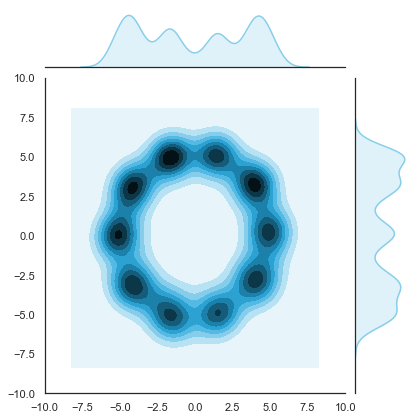

Step:  14200   |  D real loss:  0.73305935   |  D fake loss:  0.62738377   |  G loss:  0.04885547


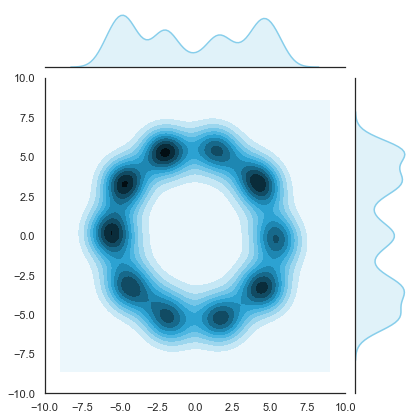

Step:  14400   |  D real loss:  0.69995016   |  D fake loss:  0.7005944   |  G loss:  0.034236442


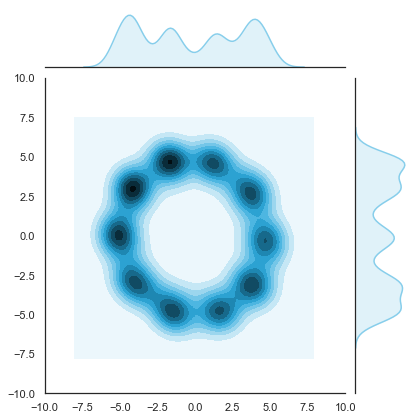

Step:  14600   |  D real loss:  0.7443617   |  D fake loss:  0.67279744   |  G loss:  0.037494358


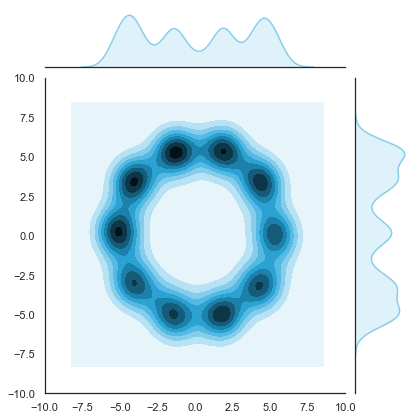

Step:  14800   |  D real loss:  0.70736367   |  D fake loss:  0.684793   |  G loss:  0.03813959


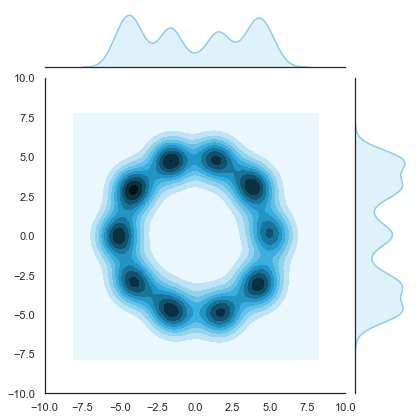

Step:  15000   |  D real loss:  0.719128   |  D fake loss:  0.6659075   |  G loss:  0.03062261


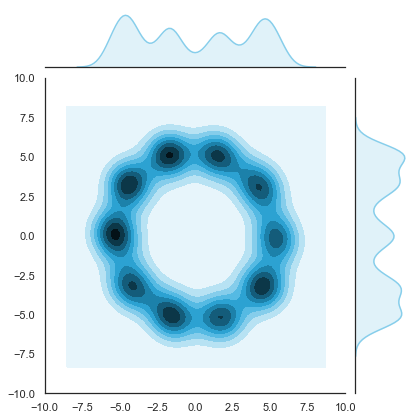

Step:  15200   |  D real loss:  0.7402375   |  D fake loss:  0.6483756   |  G loss:  0.032404352


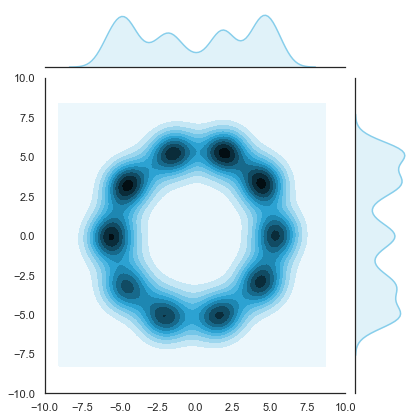

Step:  15400   |  D real loss:  0.74420583   |  D fake loss:  0.6644418   |  G loss:  0.03374923


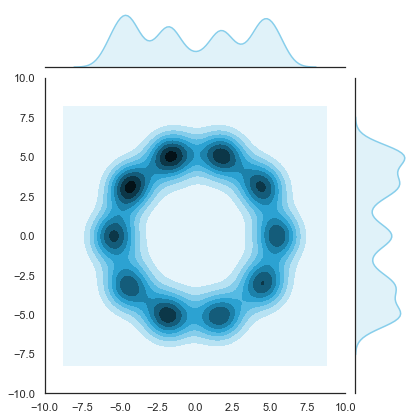

Step:  15600   |  D real loss:  0.6897206   |  D fake loss:  0.71352434   |  G loss:  0.028005362


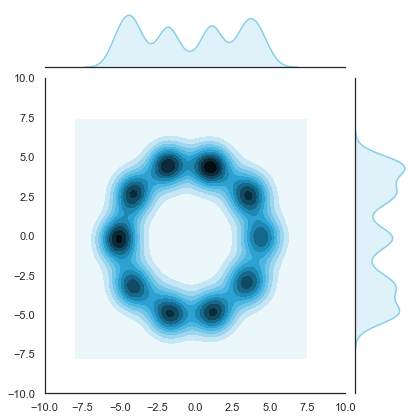

Step:  15800   |  D real loss:  0.7306002   |  D fake loss:  0.68026614   |  G loss:  0.02967782


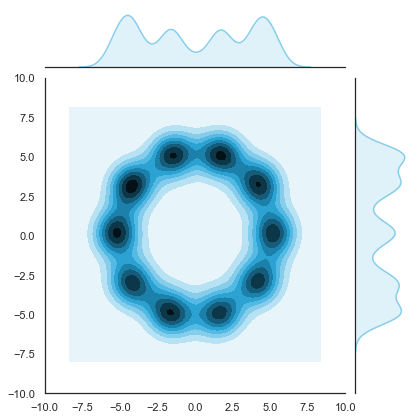

Step:  16000   |  D real loss:  0.7114376   |  D fake loss:  0.64384353   |  G loss:  0.03117436


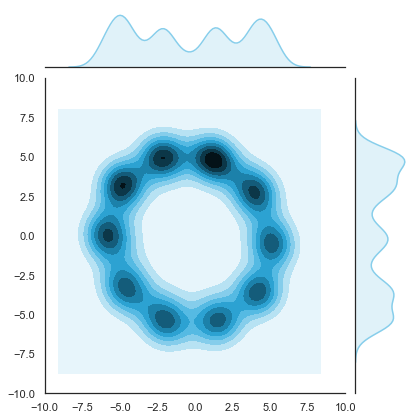

Step:  16200   |  D real loss:  0.69365364   |  D fake loss:  0.6930419   |  G loss:  0.027402123


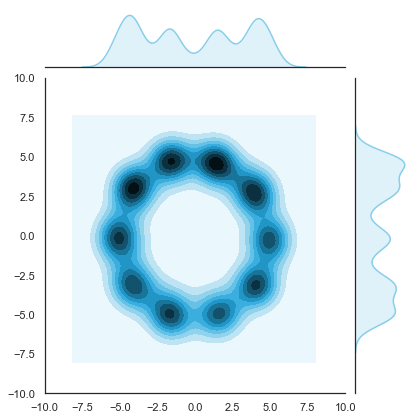

Step:  16400   |  D real loss:  0.7322303   |  D fake loss:  0.6546235   |  G loss:  0.031141724


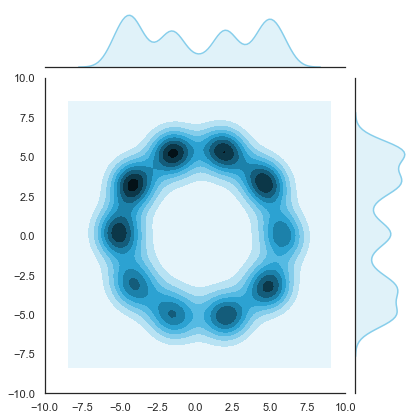

Step:  16600   |  D real loss:  0.6924419   |  D fake loss:  0.6997989   |  G loss:  0.036102727


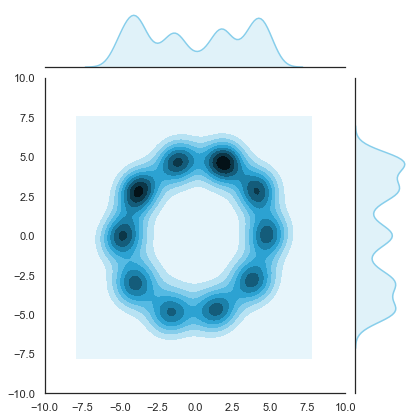

Step:  16800   |  D real loss:  0.7055086   |  D fake loss:  0.6816681   |  G loss:  0.031930126


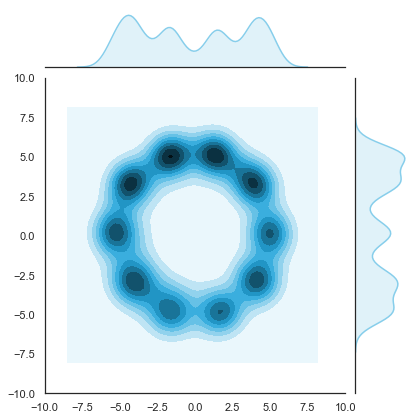

Step:  17000   |  D real loss:  0.7056712   |  D fake loss:  0.6877753   |  G loss:  0.03364827


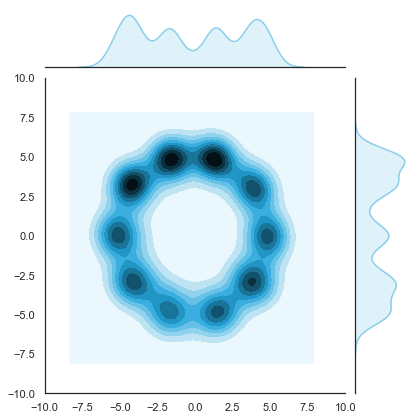

Step:  17200   |  D real loss:  0.69813186   |  D fake loss:  0.6949494   |  G loss:  0.038400203


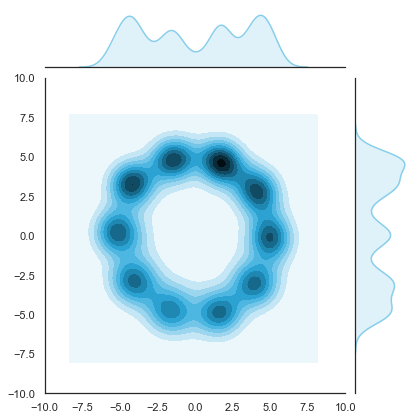

Step:  17400   |  D real loss:  0.69588   |  D fake loss:  0.6952421   |  G loss:  0.03267228


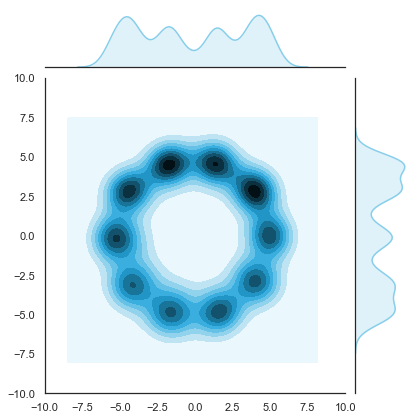

Step:  17600   |  D real loss:  0.6735493   |  D fake loss:  0.724335   |  G loss:  0.032888994


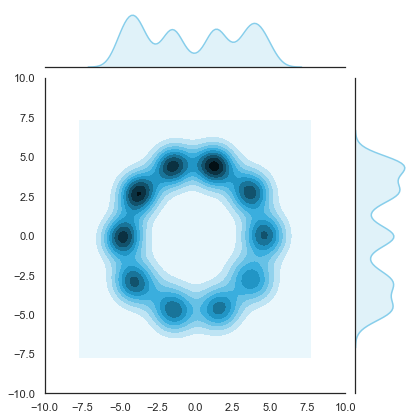

Step:  17800   |  D real loss:  0.70837337   |  D fake loss:  0.6876381   |  G loss:  0.031313606


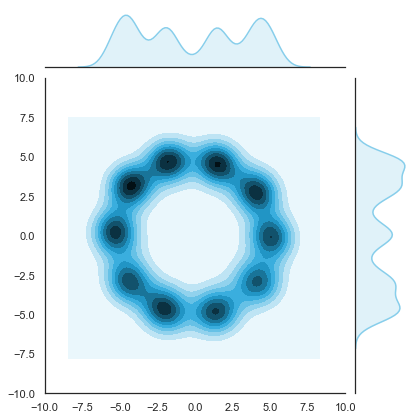

Step:  18000   |  D real loss:  0.70518684   |  D fake loss:  0.6966349   |  G loss:  0.034705076


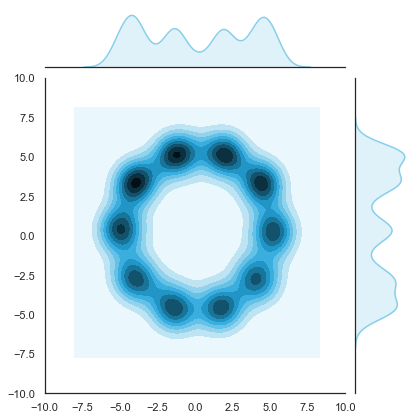

Step:  18200   |  D real loss:  0.7398117   |  D fake loss:  0.67113656   |  G loss:  0.03386279


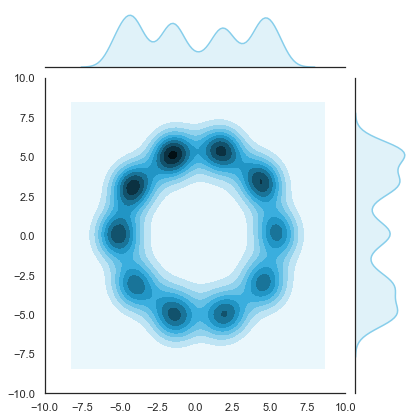

Step:  18400   |  D real loss:  0.7031986   |  D fake loss:  0.6855994   |  G loss:  0.027794836


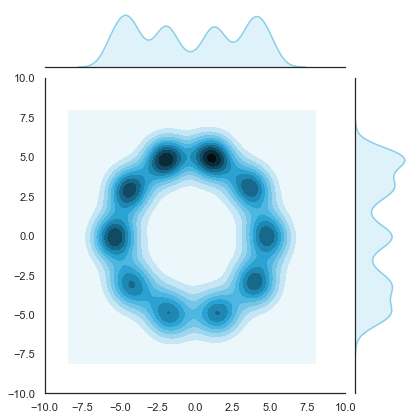

Step:  18600   |  D real loss:  0.6995669   |  D fake loss:  0.6891224   |  G loss:  0.027190669


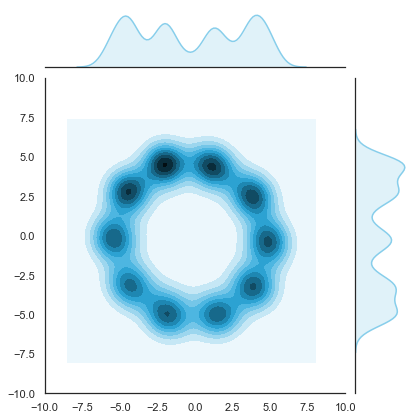

Step:  18800   |  D real loss:  0.6703099   |  D fake loss:  0.7365025   |  G loss:  0.029634513


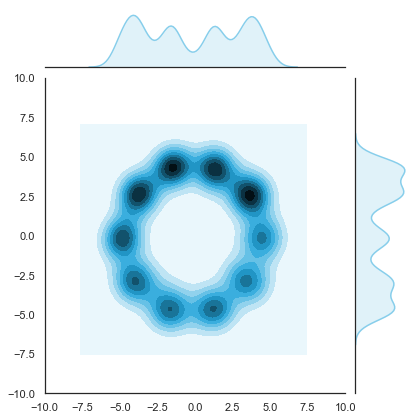

Step:  19000   |  D real loss:  0.675719   |  D fake loss:  0.69458807   |  G loss:  0.028710794


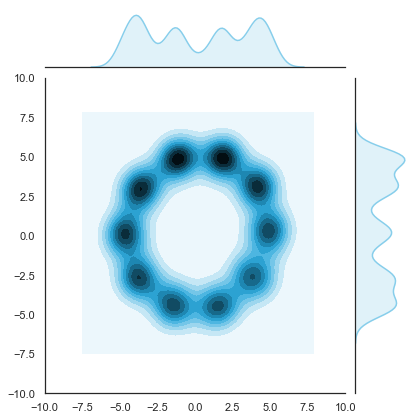

Step:  19200   |  D real loss:  0.67337024   |  D fake loss:  0.7082842   |  G loss:  0.028469732


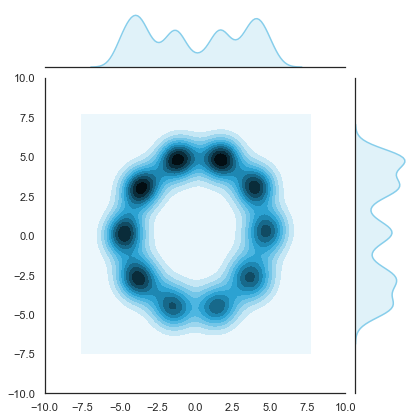

Step:  19400   |  D real loss:  0.6588906   |  D fake loss:  0.7387159   |  G loss:  0.029576095


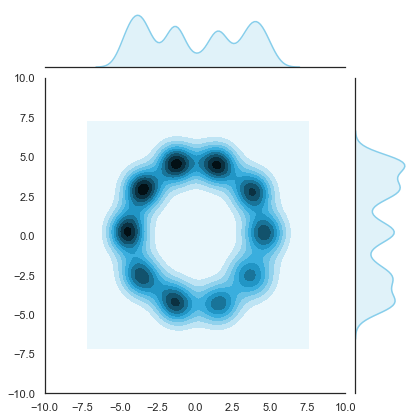

Step:  19600   |  D real loss:  0.67837375   |  D fake loss:  0.73902243   |  G loss:  0.028006652


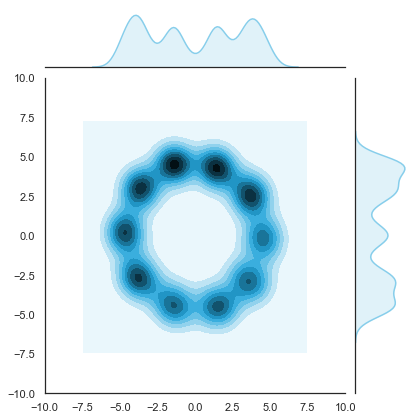

Step:  19800   |  D real loss:  0.65933603   |  D fake loss:  0.74454504   |  G loss:  0.030786147


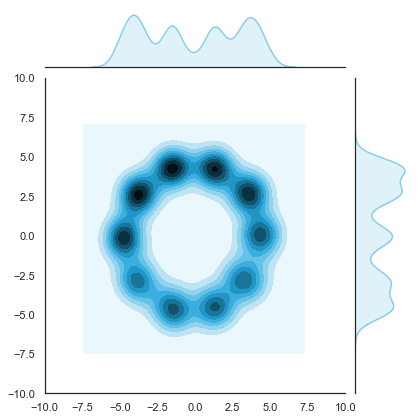

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(20000):
    z_samples = np.random.uniform(-1., 1., [batch_size, z_dim])
    Gz = sess.run(GZ, feed_dict={Zplaceholder: z_samples})
    for t in range(T):
        for u in range(U):
            x_samples = data_generator()
            sess.run(optimizer_d, feed_dict={Xplaceholder: x_samples, GZplaceholder: Gz})
            real_loss, fake_loss = sess.run([loss_d_real, loss_d_fake], 
                                                       feed_dict={Xplaceholder: x_samples, GZplaceholder: Gz})
        grad = sess.run(d_grad, feed_dict={GZplaceholder: Gz})
        Gz += 0.1 * grad
    sess.run(optimizer_g, feed_dict={Zplaceholder: z_samples, GZplaceholder: Gz})
    g_ls = sess.run(loss_g, feed_dict={Zplaceholder: z_samples, GZplaceholder: Gz})
    if not i%200:
        print('Step: ', i, '  |  D real loss: ', real_loss, '  |  D fake loss: ', fake_loss, '  |  G loss: ', g_ls)
        G = sess.run(GZ, feed_dict={Zplaceholder: z_samples})
        x = G[:, 0]
        y = G[:, 1]
        sns.set(style="white", color_codes=True)
        sns.jointplot(x, y, kind='kde', color="skyblue", xlim=(-10, 10), ylim=(-10, 10))
        plt.show()

In [ ]:
G = sess.run(GZ, feed_dict={Zplaceholder: z_samples})
x = G[:, 0]
y = G[:, 1]
sns.set(style="white", color_codes=True)
sns.jointplot(x, y, kind='kde', color="skyblue", xlim=(-10, 10), ylim=(-10, 10))
plt.show()